In [46]:
# Importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("E:\Data set\CarsPrediction 2.xlsx")
df.head()

,Unnamed: 0,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel,EMI,Price,Unnamed: 12,Unnamed: 13
0,0,New Delhi,2012,Ford,Fiesta,IV,Manual,68356,2nd Owner,Diesel,5808,261099,NaN,NaN
1,1,New Delhi,2012,Maruti,Swift,IV,Manual,126803,1st Owner,Diesel,6097,274099,NaN,NaN
2,2,New Delhi,2017,Ford,New,TREND,Manual,3430,1st Owner,Petrol,10272,461799,NaN,NaN
3,3,New Delhi,2013,Maruti,Swift,IV,Manual,105088,1st Owner,Petrol,7879,354199,NaN,NaN
4,4,New Delhi,2012,Maruti,Swift,ZXI,Manual,70990,1st Owner,Petrol,9527,428299,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4881 non-null   int64  
 1   Location      4881 non-null   object 
 2   Year          4881 non-null   int64  
 3   Brand         4881 non-null   object 
 4   Car_model     4881 non-null   object 
 5   Engine        4881 non-null   object 
 6   Transmission  4881 non-null   object 
 7   Kilometer     4881 non-null   int64  
 8   Owner         4881 non-null   object 
 9   Fuel          4881 non-null   object 
 10  EMI           4881 non-null   int64  
 11  Price         4881 non-null   int64  
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   2 non-null      object 
dtypes: float64(1), int64(5), object(8)
memory usage: 534.0+ KB


In [4]:
df.shape

(4881, 14)

In [5]:
df.isna().sum()

Unnamed: 0         0
Location           0
Year               0
Brand              0
Car_model          0
Engine             0
Transmission       0
Kilometer          0
Owner              0
Fuel               0
EMI                0
Price              0
Unnamed: 12     4881
Unnamed: 13     4879
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Year,Kilometer,EMI,Price,Unnamed: 12
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,0.0
mean,293.580824,2016.320631,45909.972547,13112.705593,5.894820e+05,NaN
std,199.825992,2.312617,33048.894727,6670.669116,2.998799e+05,NaN
min,0.000000,2007.000000,58.000000,2678.000000,1.203990e+05,NaN
25%,122.000000,2015.000000,22276.000000,8864.000000,3.984990e+05,NaN
50%,262.000000,2017.000000,38808.000000,11436.000000,5.140990e+05,NaN
75%,448.000000,2018.000000,61424.000000,15168.000000,6.818990e+05,NaN
max,767.000000,2021.000000,277105.000000,79119.000000,3.556799e+06,NaN


In [7]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 12','Unnamed: 13'])

In [8]:
df.head()

,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel,EMI,Price
0,New Delhi,2012,Ford,Fiesta,IV,Manual,68356,2nd Owner,Diesel,5808,261099
1,New Delhi,2012,Maruti,Swift,IV,Manual,126803,1st Owner,Diesel,6097,274099
2,New Delhi,2017,Ford,New,TREND,Manual,3430,1st Owner,Petrol,10272,461799
3,New Delhi,2013,Maruti,Swift,IV,Manual,105088,1st Owner,Petrol,7879,354199
4,New Delhi,2012,Maruti,Swift,ZXI,Manual,70990,1st Owner,Petrol,9527,428299


In [9]:
dfq = df[['Location','Year','Transmission','Owner','Fuel']]

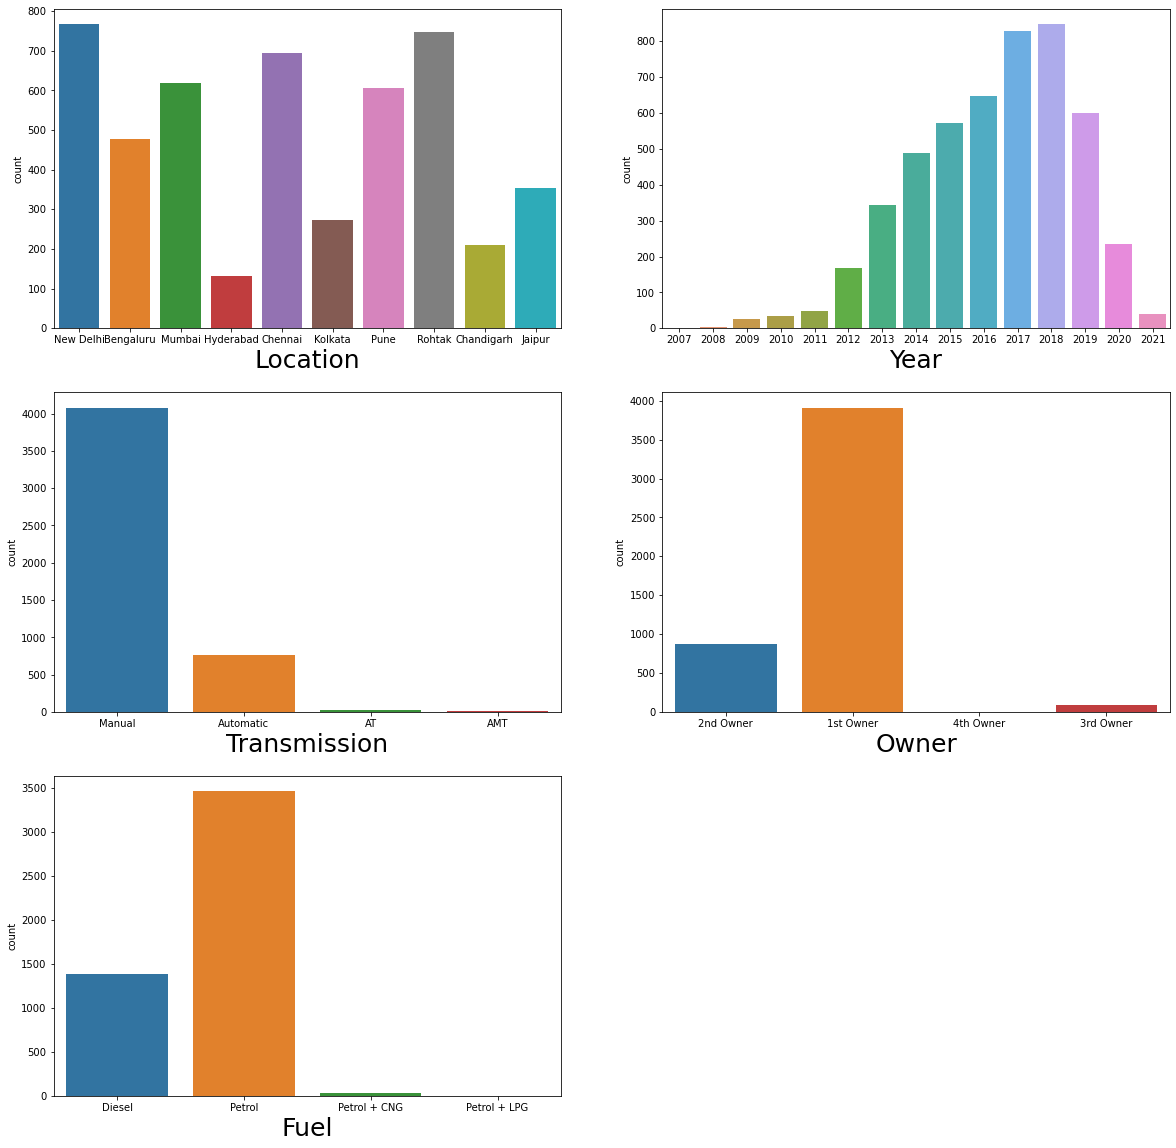

In [10]:
plt.figure(figsize = (20,20))
plt_num =1

for column in dfq:
    if plt_num<=5:
        sx = plt.subplot(3,2,plt_num)
        sns.countplot(dfq[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [11]:
le = LabelEncoder()

In [12]:
df1 = le.fit_transform(df['Location'])
pd.Series(df1)
df['Location'] = df1
df2 = le.fit_transform(df['Brand'])
pd.Series(df2)
df['Brand'] = df2
df3 = le.fit_transform(df['Car_model'])
pd.Series(df3)
df['Car_model'] = df3
df4 = le.fit_transform(df['Engine'])
pd.Series(df4)
df['Engine'] = df4
df5 = le.fit_transform(df['Transmission'])
pd.Series(df5)
df['Transmission'] = df5
df6 = le.fit_transform(df['Owner'])
pd.Series(df6)
df['Owner'] = df6
df7 = le.fit_transform(df['Fuel'])
pd.Series(df7)
df['Fuel'] = df7

In [13]:
df.describe()

,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel,EMI,Price
count,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03
mean,5.211022,2016.320631,11.657242,46.324729,87.502151,2.825241,45909.972547,0.218808,0.723622,13112.705593,5.894820e+05
std,2.980560,2.312617,4.730169,31.903062,52.084685,0.414375,33048.894727,0.463043,0.463010,6670.669116,2.998799e+05
min,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,2678.000000,1.203990e+05
25%,2.000000,2015.000000,7.000000,19.000000,52.000000,3.000000,22276.000000,0.000000,0.000000,8864.000000,3.984990e+05
50%,6.000000,2017.000000,14.000000,42.000000,82.000000,3.000000,38808.000000,0.000000,1.000000,11436.000000,5.140990e+05
75%,8.000000,2018.000000,14.000000,83.000000,144.000000,3.000000,61424.000000,0.000000,1.000000,15168.000000,6.818990e+05
max,9.000000,2021.000000,23.000000,108.000000,180.000000,3.000000,277105.000000,3.000000,3.000000,79119.000000,3.556799e+06


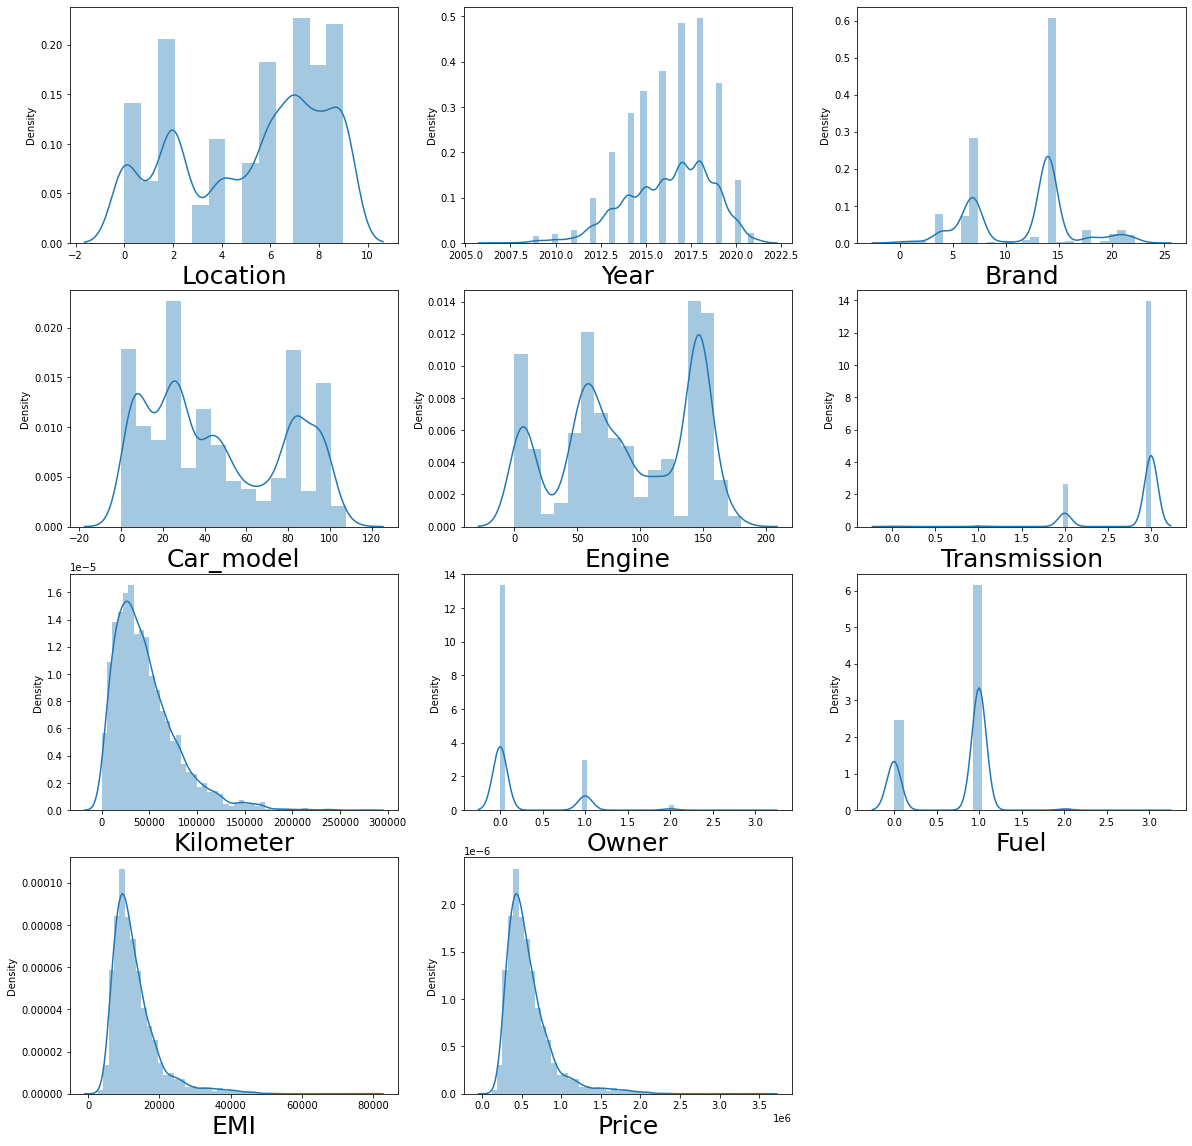

In [14]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=11:
        sx = plt.subplot(4,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

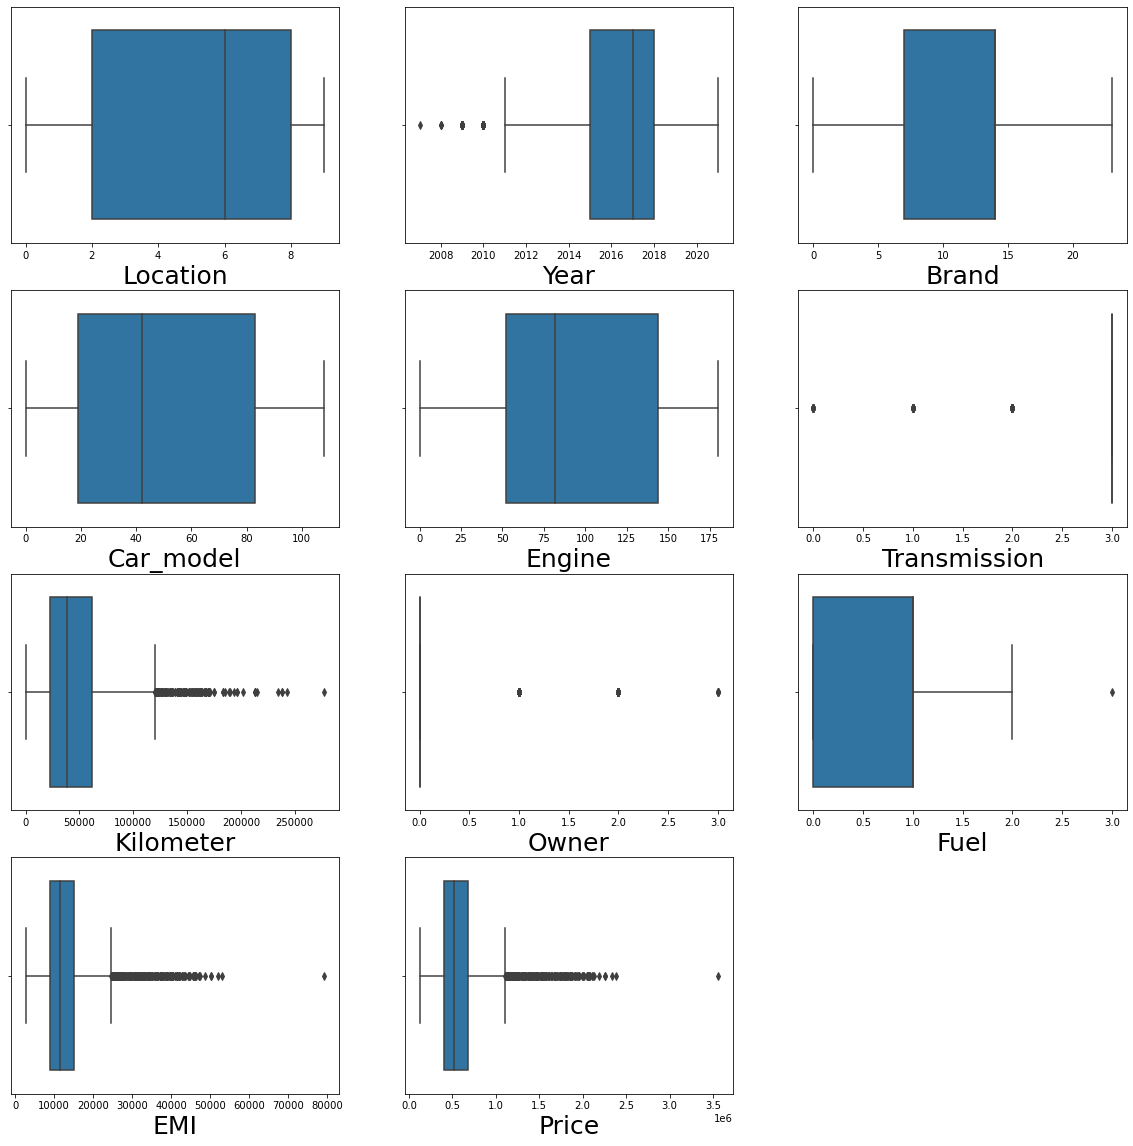

In [15]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=11:
        sx = plt.subplot(4,3,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.show()

In [16]:
##finding the outliers 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1
iqr

Location             6.0
Year                 3.0
Brand                7.0
Car_model           64.0
Engine              92.0
Transmission         0.0
Kilometer        39148.0
Owner                0.0
Fuel                 1.0
EMI               6304.0
Price           283400.0
dtype: float64

In [17]:
# Removing outliers in the Runs columns
kilo = (q3.Kilometer + (1.5 * iqr.Kilometer))
kilo
index = np.where(df['Kilometer']>kilo)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel,EMI,Price
0,0,7,2012,4,34,49,3,68356,1,0,5808,261099
1,2,7,2017,4,64,127,3,3430,0,1,10272,461799
2,3,7,2013,14,83,49,3,105088,0,1,7879,354199
3,4,7,2012,14,83,165,3,70990,0,1,9527,428299
4,5,7,2013,14,83,49,3,83414,0,0,7625,342799
...,...,...,...,...,...,...,...,...,...,...,...,...
4699,4876,4,2016,14,5,149,3,85830,0,1,6758,303799
4700,4877,4,2017,14,5,62,3,69119,0,1,6322,284199
4701,4878,4,2018,14,27,86,3,18637,0,1,9503,427199
4702,4879,4,2018,7,42,145,3,105252,0,1,11763,528799


In [18]:
# Removing outliers in the Runs columns
pri = (q3.Price + (1.5 * iqr.Price))
pri
index = np.where(df['Price']>pri)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel,EMI,Price
0,0,7,2012,4,34,49,3,68356,1,0,5808,261099
1,2,7,2017,4,64,127,3,3430,0,1,10272,461799
2,3,7,2013,14,83,49,3,105088,0,1,7879,354199
3,4,7,2012,14,83,165,3,70990,0,1,9527,428299
4,5,7,2013,14,83,49,3,83414,0,0,7625,342799
...,...,...,...,...,...,...,...,...,...,...,...,...
4414,4876,4,2016,14,5,149,3,85830,0,1,6758,303799
4415,4877,4,2017,14,5,62,3,69119,0,1,6322,284199
4416,4878,4,2018,14,27,86,3,18637,0,1,9503,427199
4417,4879,4,2018,7,42,145,3,105252,0,1,11763,528799


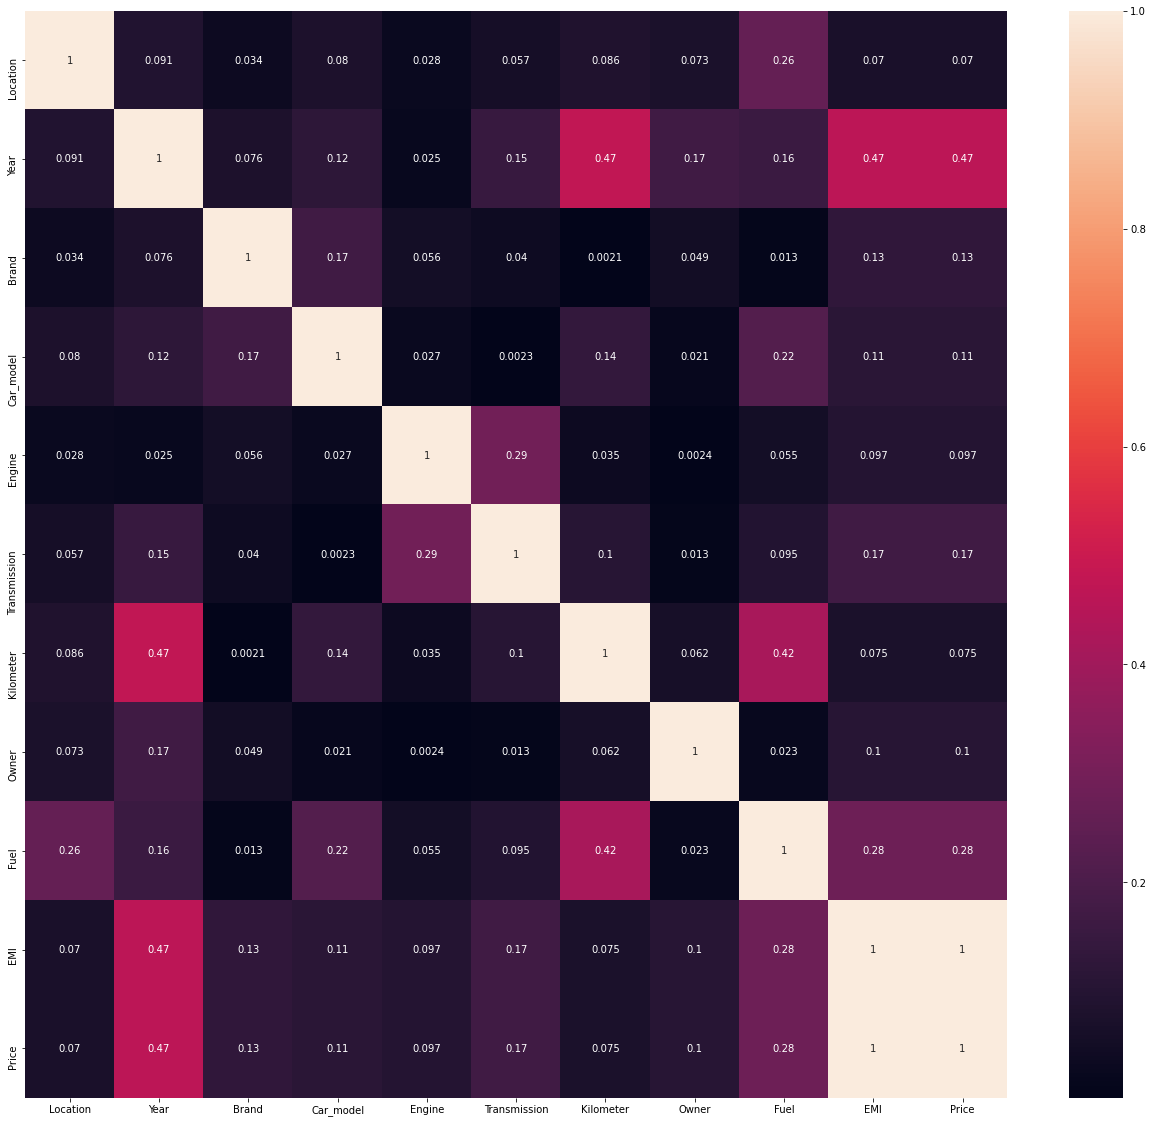

In [19]:
#finding the Co-relation between the columns using heatmap
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

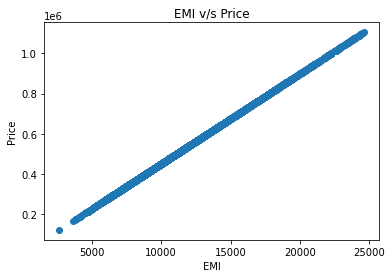

In [20]:
## plotting scatter plot to confirm co_relation between Runs_Allowed and Earned_Runs
plt.scatter(df.EMI,df.Price)
plt.xlabel('EMI')
plt.ylabel('Price')
plt.title('EMI v/s Price')
plt.show()

In [21]:
##Dropping the columns which has has high co_relation between each other
# splitting the features and labels into x and y
x = df.drop(columns =['Price','EMI'])
y = df['Price']

In [22]:
x

,Location,Year,Brand,Car_model,Engine,Transmission,Kilometer,Owner,Fuel
0,7,2012,4,34,49,3,68356,1,0
2,7,2017,4,64,127,3,3430,0,1
3,7,2013,14,83,49,3,105088,0,1
4,7,2012,14,83,165,3,70990,0,1
5,7,2013,14,83,49,3,83414,0,0
...,...,...,...,...,...,...,...,...,...
4876,4,2016,14,5,149,3,85830,0,1
4877,4,2017,14,5,62,3,69119,0,1
4878,4,2018,14,27,86,3,18637,0,1
4879,4,2018,7,42,145,3,105252,0,1


In [23]:
y

0       261099
2       461799
3       354199
4       428299
5       342799
         ...  
4876    303799
4877    284199
4878    427199
4879    528799
4880    322899
Name: Price, Length: 4419, dtype: int64

In [24]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.30,random_state = 34)

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
#Checking the score of linearRegression for training data
lr.score(x_train,y_train)

0.4075095004948386

In [30]:
lr.score(x_test,y_test)

0.4265607234455646

In [31]:
y_pred = lr.predict(x_test)
y_pred

array([331143.53196626, 565193.97960597, 589554.74107517, ...,
       620202.71163027, 662704.89045277, 578685.59594962])

In [32]:
#Checking the MeanAbsolute Error
mean_absolute_error(y_test,y_pred)

113905.75473833713

In [33]:
#Checking the Mean Squared Error
mean_squared_error(y_test,y_pred)

20580037259.990955

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

143457.4405877609

In [35]:
#Applyiing Lasso 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [36]:
alpha = lacv.alpha_
alpha

9.023737398665524

In [37]:
#Applying Ridge 
las_reg = Lasso(alpha)
las_reg.fit(x_train,y_train)

Lasso(alpha=9.023737398665524)

In [38]:
las_reg.score(x_test,y_test)

0.4265446838531447

In [39]:
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [40]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [41]:
rd.score(x_test,y_test)

0.4265607192883345

In [42]:
#Applying another algorithm for regression KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [43]:
knn.score(x_train,y_train)

0.7319415028483753

In [44]:
knn.score(x_test,y_test)

0.5822556297488929

In [45]:
y_pred = knn.predict(x_test)
y_pred

array([319519., 362139., 493339., ..., 560779., 582179., 461879.])